In [11]:
# Importar librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt # Importamos matplotlib.pyplot como el alias plt para visualización de datos
%matplotlib inline
import seaborn as sns # Importamos seaborn como el alias sns para visualización de datos

In [12]:
df = pd.read_csv('/content/base_da_2.csv')

In [13]:
df.info()
df.head(24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_provincia          8519 non-null   int64  
 1   provincia              8519 non-null   object 
 2   cod_ncm_6d             8519 non-null   int64  
 3   ncm_6d                 8519 non-null   object 
 4   seccion                8519 non-null   object 
 5   tiene_vcr              8519 non-null   int64  
 6   centralidad            8479 non-null   float64
 7   complejidad_producto   8479 non-null   float64
 8   complejidad_provincia  8519 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 599.1+ KB


,cod_provincia,provincia,cod_ncm_6d,ncm_6d,seccion,tiene_vcr,centralidad,complejidad_producto,complejidad_provincia
0,2,Ciudad Autónoma de Buenos Aires,10129,"Caballos, exc. reproductores de raza pura","Agro, Alimentos y Bebidas",0,0.1663,0.0937,0.087869
1,2,Ciudad Autónoma de Buenos Aires,10619,Animales mamíferos ncop.,"Agro, Alimentos y Bebidas",0,0.1621,-0.0684,0.087869
2,2,Ciudad Autónoma de Buenos Aires,20621,Lenguas bovinas congeladas,"Agro, Alimentos y Bebidas",0,0.0943,-0.8430,0.087869
3,2,Ciudad Autónoma de Buenos Aires,20622,Hígados bovinos congelados,"Agro, Alimentos y Bebidas",0,0.1358,-0.5205,0.087869
4,2,Ciudad Autónoma de Buenos Aires,20629,"Despojos de bovinos, comestibles, congelados","Agro, Alimentos y Bebidas",0,0.1186,-1.1601,0.087869
5,2,Ciudad Autónoma de Buenos Aires,50400,"Tripas, vejigas y estómagos de animales, excl....","Agro, Alimentos y Bebidas",0,0.1641,-0.9798,0.087869
6,2,Ciudad Autónoma de Buenos Aires,80212,Almendras s/cáscara,"Agro, Alimentos y Bebidas",0,0.1028,-0.7982,0.087869
7,2,Ciudad Autónoma de Buenos Aires,110720,"Malta tostada,entera o partida","Agro, Alimentos y Bebidas",0,0.1732,0.0554,0.087869
8,2,Ciudad Autónoma de Buenos Aires,130190,Goma laca,"Agro, Alimentos y Bebidas",0,0.0968,-2.6728,0.087869
9,2,Ciudad Autónoma de Buenos Aires,150210,Sebo bovino en bruto,"Agro, Alimentos y Bebidas",0,0.1151,-0.6267,0.087869


In [14]:
df.describe() # Observamos las características estadísticas de las variables cuantitativas


,cod_provincia,cod_ncm_6d,tiene_vcr,centralidad,complejidad_producto,complejidad_provincia
count,8519.000000,8519.000000,8519.000000,8479.000000,8479.000000,8519.000000
mean,32.958094,517531.974528,0.186876,0.168337,-0.085274,-0.362356
std,31.373325,292709.047538,0.389835,0.039407,0.971423,0.310228
min,2.000000,10121.000000,0.000000,0.017200,-3.852500,-1.333220
25%,6.000000,280440.000000,0.000000,0.143950,-0.784000,-0.361890
50%,14.000000,510529.000000,0.000000,0.174300,0.049700,-0.334866
75%,66.000000,841280.000000,0.000000,0.198100,0.654400,-0.165786
max,94.000000,999805.000000,1.000000,0.252200,2.626900,0.087869


In [16]:
df.size

76671

In [15]:
df.isnull().sum()

cod_provincia             0
provincia                 0
cod_ncm_6d                0
ncm_6d                    0
seccion                   0
tiene_vcr                 0
centralidad              40
complejidad_producto     40
complejidad_provincia     0
dtype: int64

In [17]:
df.set_index('centralidad')

,cod_provincia,provincia,cod_ncm_6d,ncm_6d,seccion,tiene_vcr,complejidad_producto,complejidad_provincia
centralidad,,,,,,,,
0.1663,2,Ciudad Autónoma de Buenos Aires,10129,"Caballos, exc. reproductores de raza pura","Agro, Alimentos y Bebidas",0,0.0937,0.087869
0.1621,2,Ciudad Autónoma de Buenos Aires,10619,Animales mamíferos ncop.,"Agro, Alimentos y Bebidas",0,-0.0684,0.087869
0.0943,2,Ciudad Autónoma de Buenos Aires,20621,Lenguas bovinas congeladas,"Agro, Alimentos y Bebidas",0,-0.8430,0.087869
0.1358,2,Ciudad Autónoma de Buenos Aires,20622,Hígados bovinos congelados,"Agro, Alimentos y Bebidas",0,-0.5205,0.087869
0.1186,2,Ciudad Autónoma de Buenos Aires,20629,"Despojos de bovinos, comestibles, congelados","Agro, Alimentos y Bebidas",0,-1.1601,0.087869
...,...,...,...,...,...,...,...,...
0.1861,94,Tierra del Fuego,903289,Reguladores de voltaje electrónicos (exc. los ...,Maquinaria,1,0.8271,-0.869854
0.1783,94,Tierra del Fuego,940490,"Almohadas y artículos de cama, ncop.",Textiles,0,-0.3266,-0.869854
NaN,94,Tierra del Fuego,999801,Aprovisionamiento de combustibles y lubricante...,Otros,0,NaN,-0.869854


In [18]:
# Eliminar filas con valores nulos en cualquier columna
df= df.dropna()

# Verificar la forma del DataFrame resultante después de eliminar filas con nulos
print("Forma del DataFrame original:", df.shape)

Forma del DataFrame original: (8479, 9)


In [19]:
df.isnull().sum()

cod_provincia            0
provincia                0
cod_ncm_6d               0
ncm_6d                   0
seccion                  0
tiene_vcr                0
centralidad              0
complejidad_producto     0
complejidad_provincia    0
dtype: int64

In [20]:
#info de la prov de Santa Cruz
df[df['provincia'] == 'Santa Cruz']

,cod_provincia,provincia,cod_ncm_6d,ncm_6d,seccion,tiene_vcr,centralidad,complejidad_producto,complejidad_provincia
6923,78,Santa Cruz,20430,"Reses o medias reses,de cordero,congeladas","Agro, Alimentos y Bebidas",1,0.0735,-0.9234,-1.33322
6924,78,Santa Cruz,20442,"Cortes de carne ovina s/deshuesar ncop.,congelada","Agro, Alimentos y Bebidas",1,0.0203,-1.0676,-1.33322
6925,78,Santa Cruz,20443,"Carne ovina, deshuesada, congelada","Agro, Alimentos y Bebidas",1,0.0796,-0.1782,-1.33322
6926,78,Santa Cruz,20690,Despojos ovino/caprino/caballar/asnal/mular co...,"Agro, Alimentos y Bebidas",1,0.0879,-1.3070,-1.33322
6927,78,Santa Cruz,30366,"Merluzas congeladas, excluido en filetes","Agro, Alimentos y Bebidas",1,0.1281,-1.0489,-1.33322
6928,78,Santa Cruz,30369,Merluzas de cola congeladas excluido en filetes,"Agro, Alimentos y Bebidas",0,0.0966,-1.8550,-1.33322
6929,78,Santa Cruz,30383,Merluzas negras congeladas evisceradas,"Agro, Alimentos y Bebidas",1,0.1139,-0.5082,-1.33322
6930,78,Santa Cruz,30389,"Pescado congelado, nep: corvinas, pescadillas,...","Agro, Alimentos y Bebidas",0,0.1182,-2.0941,-1.33322
6931,78,Santa Cruz,30399,Cabezas de Merluzas negras congeladas,"Agro, Alimentos y Bebidas",1,0.1636,-0.8371,-1.33322
6932,78,Santa Cruz,30474,"Filetes de merluzas(Merluccius spp., Urophycis...","Agro, Alimentos y Bebidas",1,0.1019,-1.0959,-1.33322


In [21]:
#complejidad por prov
df.groupby('provincia')['complejidad_producto'].mean()

provincia
Buenos Aires                       0.047660
Catamarca                         -0.916833
Chaco                             -0.660218
Chubut                            -0.373185
Ciudad Autónoma de Buenos Aires   -0.080246
Corrientes                        -0.823704
Córdoba                            0.071288
Entre Ríos                        -0.121581
Formosa                           -1.063218
Jujuy                             -1.133926
La Pampa                          -0.405106
La Rioja                          -0.686612
Mendoza                           -0.085202
Misiones                          -0.359874
Neuquén                           -0.031780
Río Negro                         -0.248237
Salta                             -0.712207
San Juan                          -0.478824
San Luis                          -0.081071
Santa Cruz                        -0.940806
Santa Fe                           0.133223
Santiago del Estero               -0.863835
Tierra del Fuego      

In [22]:
df.groupby('provincia')['complejidad_producto'].mean().sort_values(ascending=False)

provincia
Santa Fe                           0.133223
Córdoba                            0.071288
Buenos Aires                       0.047660
Neuquén                           -0.031780
Ciudad Autónoma de Buenos Aires   -0.080246
San Luis                          -0.081071
Mendoza                           -0.085202
Entre Ríos                        -0.121581
Río Negro                         -0.248237
Tucumán                           -0.320420
Misiones                          -0.359874
Chubut                            -0.373185
La Pampa                          -0.405106
San Juan                          -0.478824
Tierra del Fuego                  -0.633970
Chaco                             -0.660218
La Rioja                          -0.686612
Salta                             -0.712207
Corrientes                        -0.823704
Santiago del Estero               -0.863835
Catamarca                         -0.916833
Santa Cruz                        -0.940806
Formosa               

<Axes: xlabel='provincia'>

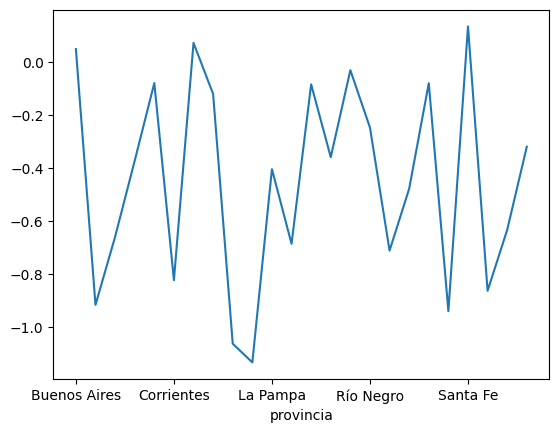

In [23]:
df.groupby('provincia')['complejidad_producto'].mean().plot()

<Axes: >

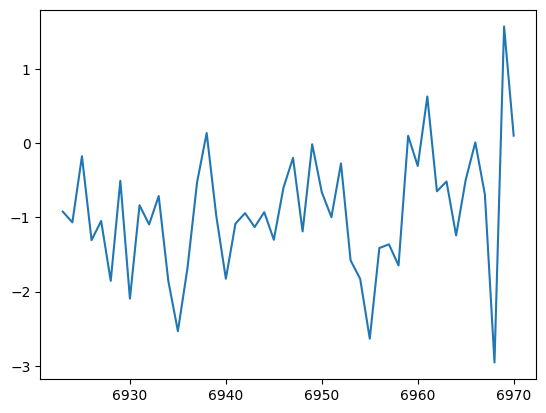

In [24]:
df[df['provincia'] == 'Santa Cruz']['complejidad_producto'].plot()

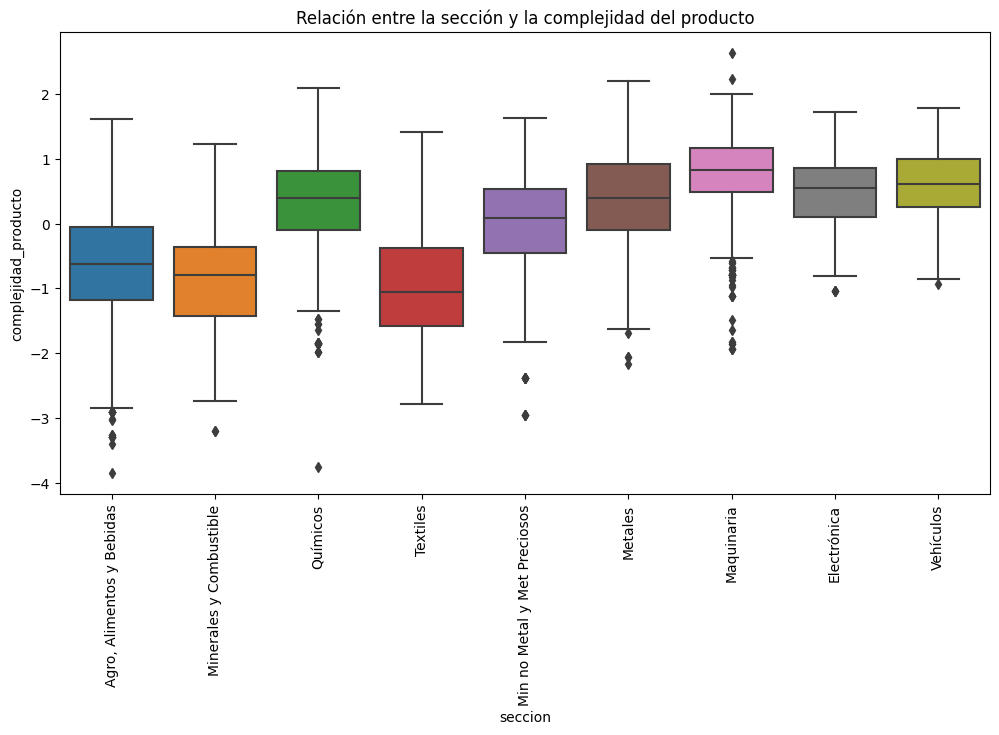

In [25]:
# Relación entre la sección y la complejidad o centralidad
plt.figure(figsize=(12, 6))
sns.boxplot(x='seccion', y='complejidad_producto', data=df)
plt.xticks(rotation=90)
plt.title('Relación entre la sección y la complejidad del producto')
plt.show()



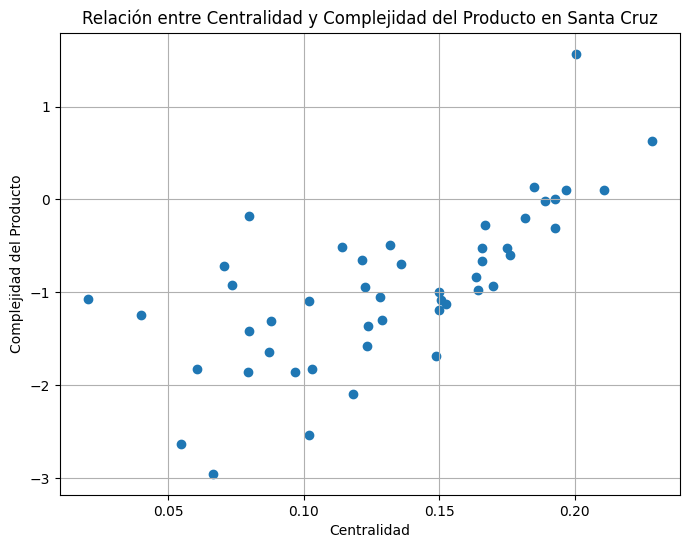

In [26]:
# Filtrar el DataFrame para la provincia de Santa Cruz
santa_cruz_df = df[df['provincia'] == 'Santa Cruz']

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(santa_cruz_df['centralidad'], santa_cruz_df['complejidad_producto'])
plt.title('Relación entre Centralidad y Complejidad del Producto en Santa Cruz')
plt.xlabel('Centralidad')
plt.ylabel('Complejidad del Producto')
plt.grid(True)
plt.show()

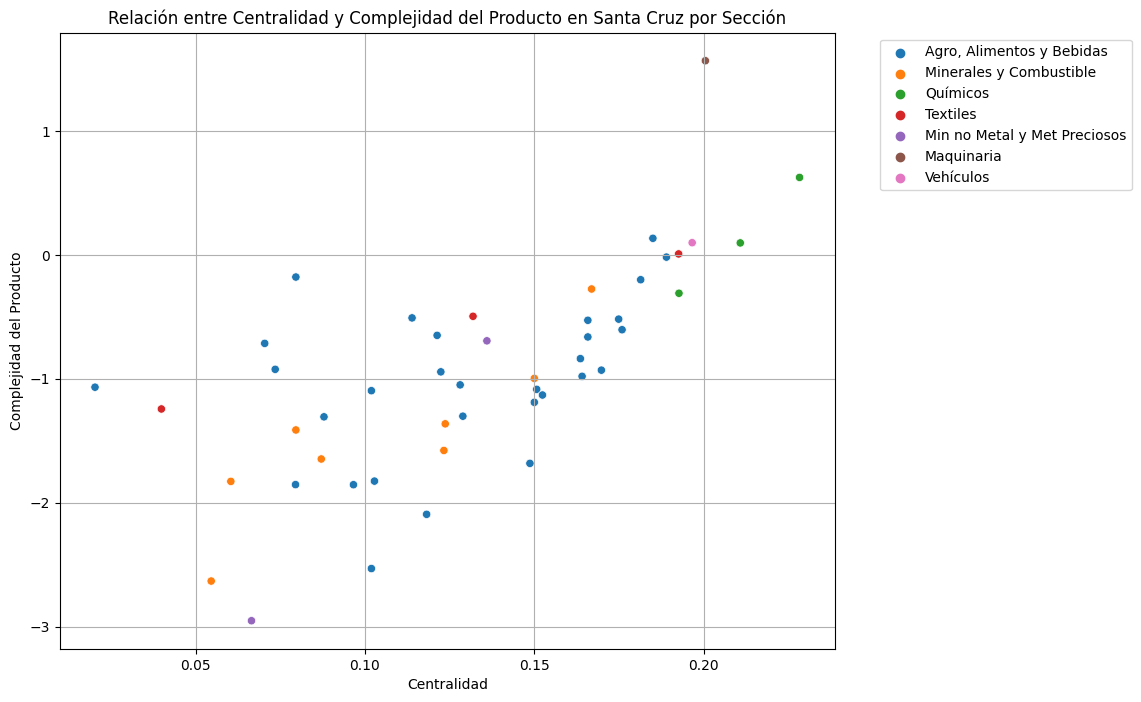

In [27]:
# Filtrar el DataFrame para la provincia de Santa Cruz
santa_cruz_df = df[df['provincia'] == 'Santa Cruz']

# Crear un gráfico de dispersión con colores por sección
plt.figure(figsize=(10, 8))
sns.scatterplot(x='centralidad', y='complejidad_producto', hue='seccion', data=santa_cruz_df)
plt.title('Relación entre Centralidad y Complejidad del Producto en Santa Cruz por Sección')
plt.xlabel('Centralidad')
plt.ylabel('Complejidad del Producto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

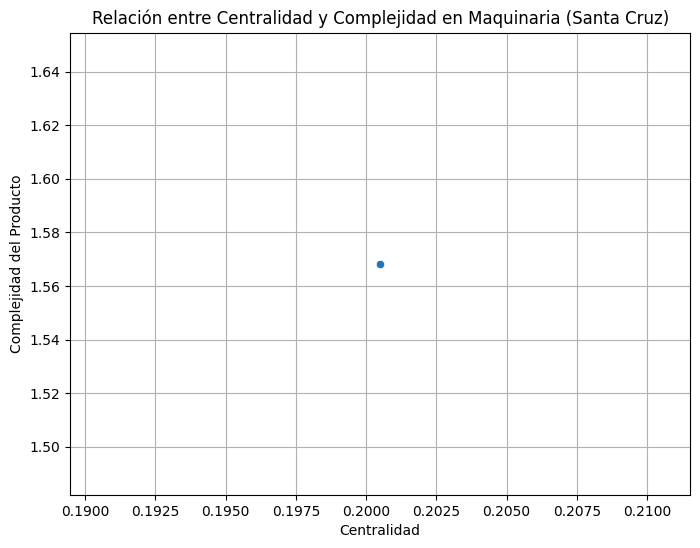

In [28]:
# Filtrar el DataFrame para productos de la sección "Maquinaria" en Santa Cruz
maquinaria_df = santa_cruz_df[santa_cruz_df['seccion'] == 'Maquinaria']

# Crear un gráfico de dispersión para productos de la sección "Maquinaria"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='centralidad', y='complejidad_producto', data=maquinaria_df)
plt.title('Relación entre Centralidad y Complejidad en Maquinaria (Santa Cruz)')
plt.xlabel('Centralidad')
plt.ylabel('Complejidad del Producto')
plt.grid(True)
plt.show()

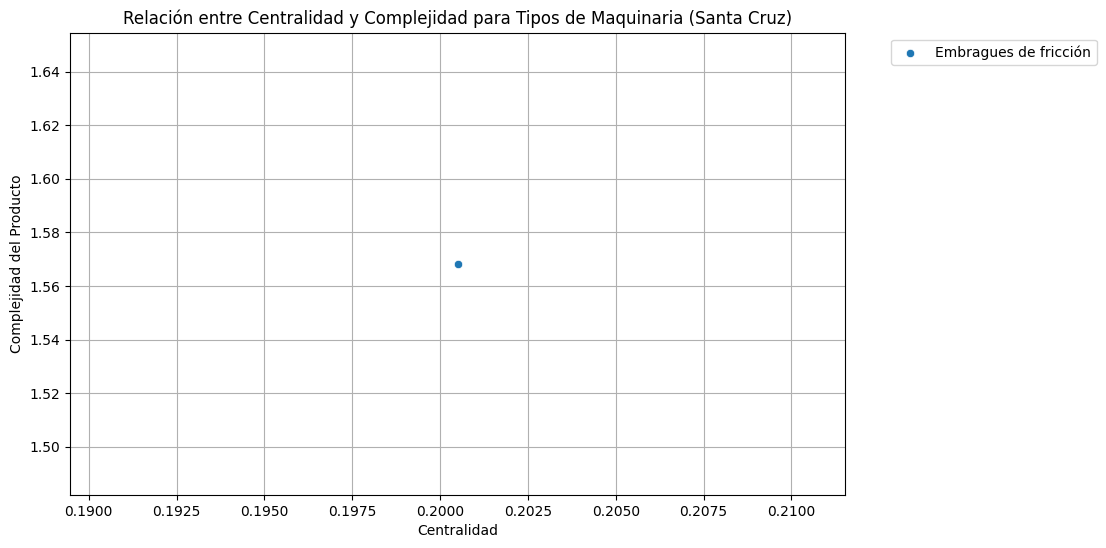

In [29]:
# Filtrar el DataFrame para la sección "Maquinaria" en Santa Cruz
maquinaria_df = santa_cruz_df[santa_cruz_df['seccion'] == 'Maquinaria']

# Obtener los diferentes tipos de productos de maquinaria presentes
tipos_maquinaria = maquinaria_df['ncm_6d'].unique()

# Crear un gráfico de dispersión para cada tipo de maquinaria
plt.figure(figsize=(10, 6))
for tipo_maquinaria in tipos_maquinaria:
    subset = maquinaria_df[maquinaria_df['ncm_6d'] == tipo_maquinaria]
    sns.scatterplot(x='centralidad', y='complejidad_producto', data=subset, label=tipo_maquinaria)

plt.title('Relación entre Centralidad y Complejidad para Tipos de Maquinaria (Santa Cruz)')
plt.xlabel('Centralidad')
plt.ylabel('Complejidad del Producto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

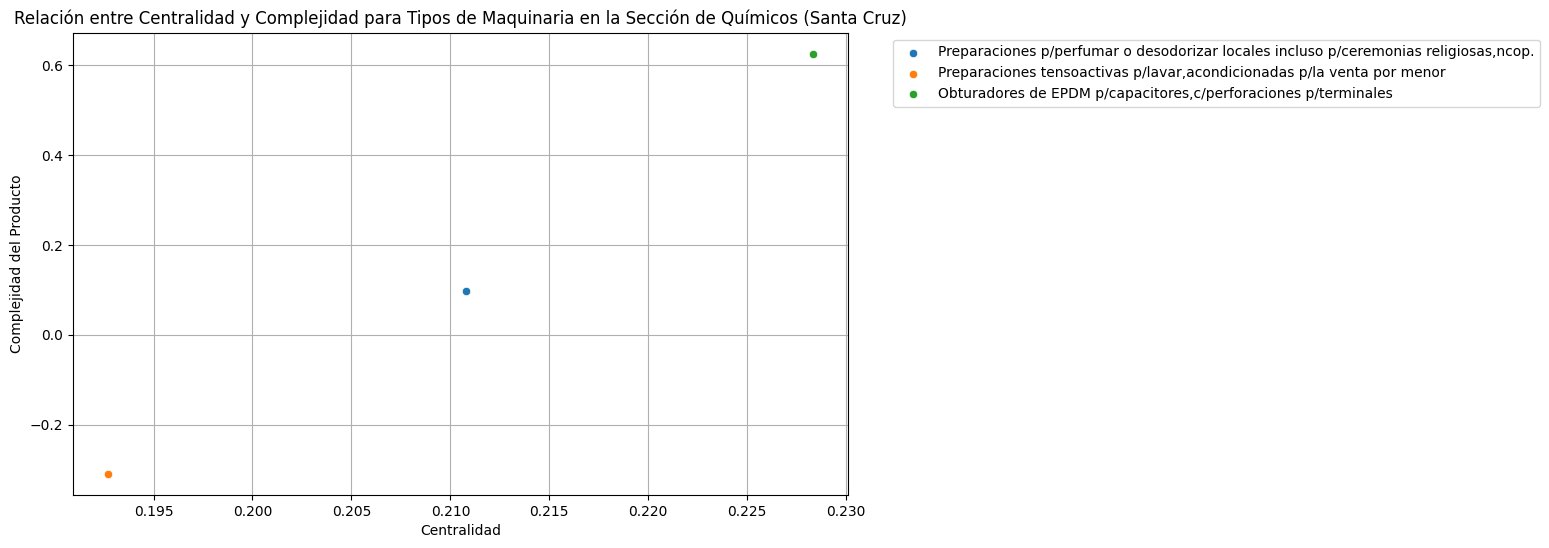

In [30]:
# Filtrar el DataFrame para la sección "Químicos" en Santa Cruz
quimicos_df = santa_cruz_df[santa_cruz_df['seccion'] == 'Químicos']

# Obtener los diferentes tipos de productos de maquinaria química presentes
tipos_quimicos = quimicos_df['ncm_6d'].unique()

# Crear un gráfico de dispersión para cada tipo de maquinaria química
plt.figure(figsize=(10, 6))
for tipo_quimico in tipos_quimicos:
    subset = quimicos_df[quimicos_df['ncm_6d'] == tipo_quimico]
    sns.scatterplot(x='centralidad', y='complejidad_producto', data=subset, label=tipo_quimico)

plt.title('Relación entre Centralidad y Complejidad para Tipos de Maquinaria en la Sección de Químicos (Santa Cruz)')
plt.xlabel('Centralidad')
plt.ylabel('Complejidad del Producto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


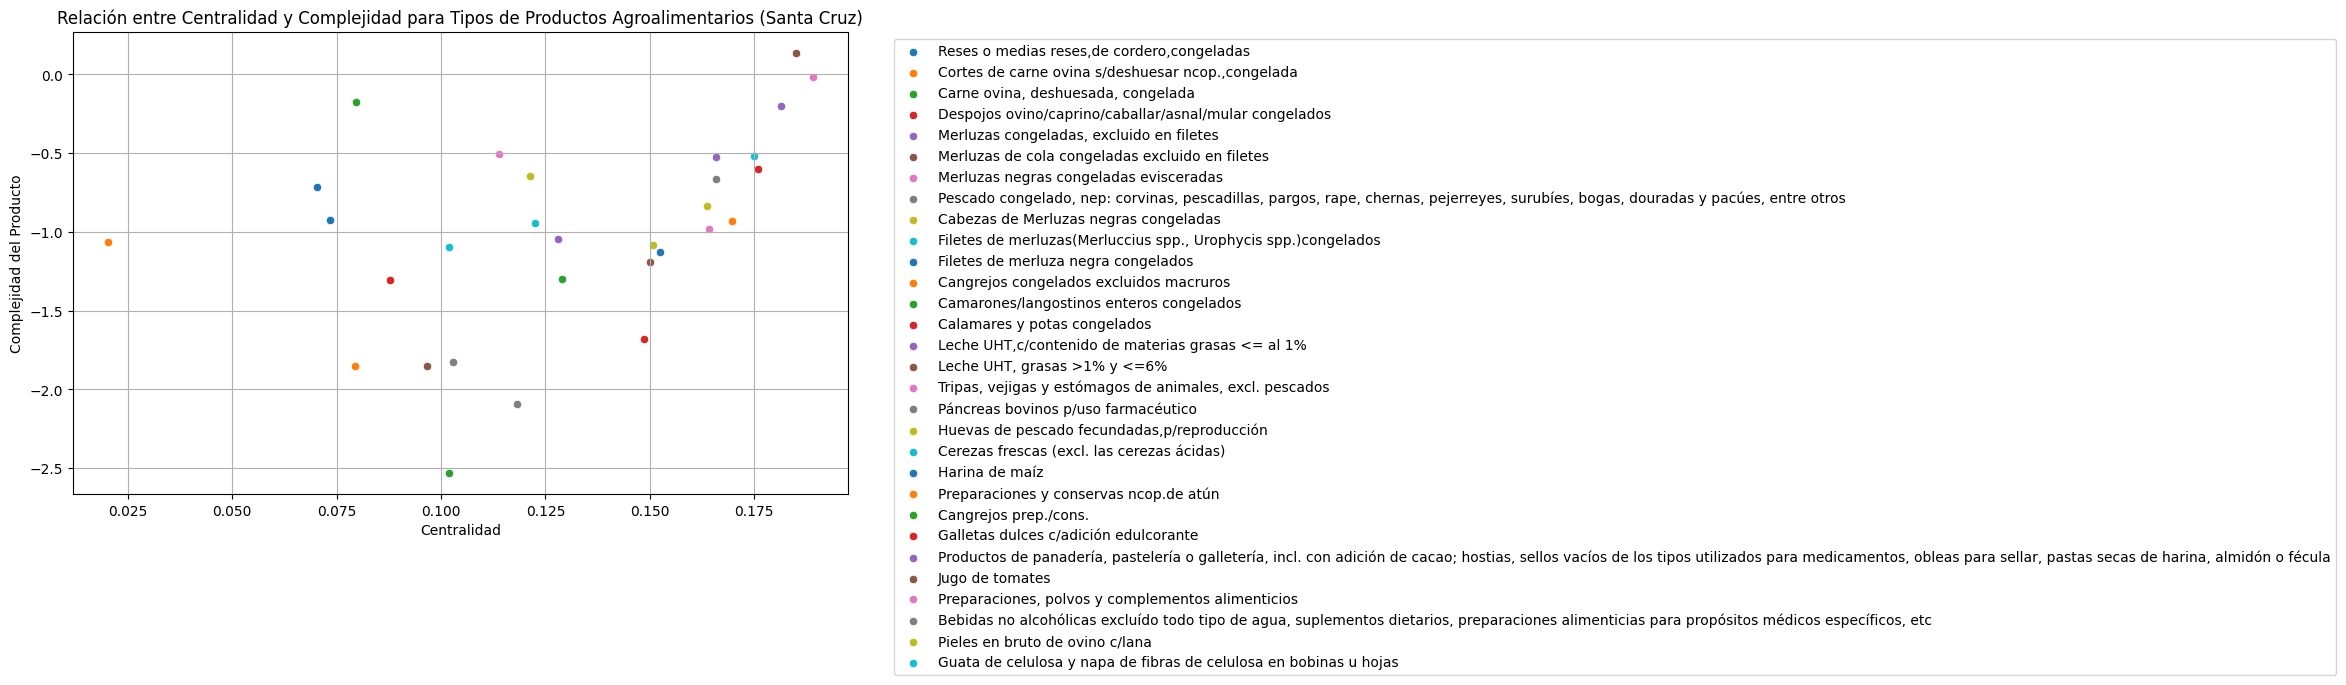

In [31]:
# Filtrar el DataFrame para la sección "Agro, Alimentos y Bebidas" en Santa Cruz
agro_df = santa_cruz_df[santa_cruz_df['seccion'] == 'Agro, Alimentos y Bebidas']

# Obtener los diferentes tipos de productos de la sección agroalimentaria presentes
tipos_agro = agro_df['ncm_6d'].unique()

# Crear un gráfico de dispersión para cada tipo de producto agroalimentario
plt.figure(figsize=(10, 6))
for tipo_agro in tipos_agro:
    subset = agro_df[agro_df['ncm_6d'] == tipo_agro]
    sns.scatterplot(x='centralidad', y='complejidad_producto', data=subset, label=tipo_agro)

plt.title('Relación entre Centralidad y Complejidad para Tipos de Productos Agroalimentarios (Santa Cruz)')
plt.xlabel('Centralidad')
plt.ylabel('Complejidad del Producto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [37]:
# Mostrar las primeras filas del DataFrame
print(df_encoded.head())

# Obtener un resumen de las características
print(df_encoded.info())
print(df_encoded.describe())


   cod_provincia  cod_ncm_6d  tiene_vcr  centralidad  complejidad_producto  \
0              2       10129          0       0.1663                0.0937   
1              2       10619          0       0.1621               -0.0684   
2              2       20621          0       0.0943               -0.8430   
3              2       20622          0       0.1358               -0.5205   
4              2       20629          0       0.1186               -1.1601   

   complejidad_provincia  provincia_Buenos_Aires  provincia_Catamarca  \
0               0.087869                       0                    0   
1               0.087869                       0                    0   
2               0.087869                       0                    0   
3               0.087869                       0                    0   
4               0.087869                       0                    0   

   provincia_Chaco  provincia_Chubut  ...  \
0                0                 0  ...   
1 

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo de regresión
model = RandomForestRegressor()

# Entrenar el modelo de regresión
model.fit(X_train, y_train)

# Realizar predicciones de regresión
predictions = model.predict(X_test)

# Evaluar el modelo de regresión
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Error cuadrático medio: {mse}')
print(f'R-cuadrado: {r2}')


Error cuadrático medio: 0.2938409371590955
R-cuadrado: 0.6850572558258664


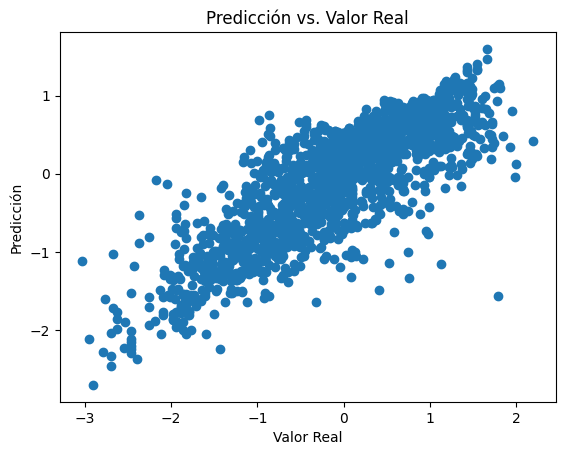

In [46]:

#Visualización de las predicciones vs. los valores reales
plt.scatter(y_test, predictions)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicción vs. Valor Real')
plt.show()


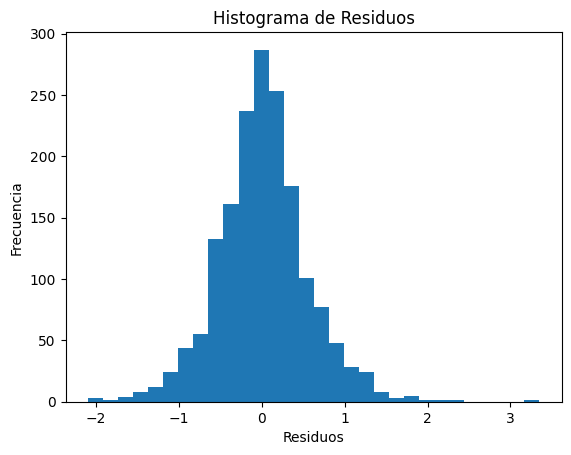

In [48]:
#Histograma de los residuosx
residuals = y_test - predictions
plt.hist(residuals, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


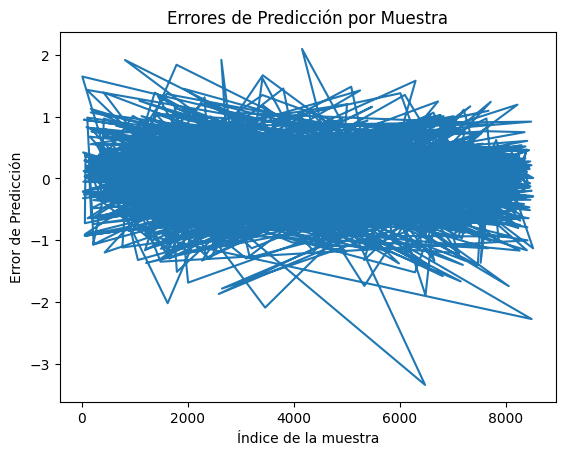

In [49]:
errors = predictions - y_test
plt.plot(errors)
plt.xlabel('Índice de la muestra')
plt.ylabel('Error de Predicción')
plt.title('Errores de Predicción por Muestra')
plt.show()

